In [ ]:
# Lekce 9

In [48]:
import pandas 

from sklearn.metrics import balanced_accuracy_score

from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import ConfusionMatrixDisplay

In [17]:
X = ["Python is great", "I like Python", "Python is the best language", "I hate Python"]
vec = CountVectorizer() # je to předělání textu na data
X = vec.fit_transform(X)
X = X.toarray()
X

array([[0, 1, 0, 1, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 1, 1, 0],
       [1, 0, 0, 1, 1, 0, 1, 1],
       [0, 0, 1, 0, 0, 0, 1, 0]])

In [18]:
vec.get_feature_names_out()

array(['best', 'great', 'hate', 'is', 'language', 'like', 'python', 'the'],
      dtype=object)

In [19]:
df = pandas.DataFrame(X, columns=vec.get_feature_names_out())
df

,best,great,hate,is,language,like,python,the
0,0,1,0,1,0,0,1,0
1,0,0,0,0,0,1,1,0
2,1,0,0,1,1,0,1,1
3,0,0,1,0,0,0,1,0


In [25]:
data = pandas.read_csv("movies.csv")
data.head()

,title,genre,text
0,Santa Barbara (2014),romance,"Because of his close friend's betrayal, music ..."
1,Behen Hogi Teri (2017),comedy,"Gattu (Rajkummar Rao) has a problem, he loves ..."
2,The Last Coffin (2003),horror,"In the movie, a strange crossword puzzle start..."
3,Lady Krampus (2016),horror,"It's Christmas time in Cleveland, Ohio and fou..."
4,"""Pandemic"" (2016)",thriller,A deadly virus is unleashed on the fictional n...


In [26]:
X = data["text"]  # výběr dat je jednoduchý - text bude X (popis toho filmu)
y = data["genre"] # a y bude žánr - na základě X se budeme snažit predikovat žánr

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0)
# máme předpřipravené hodnoty, které náš model pak bude hádat
# stratify = v trénovací a testovací sadě budou stejně zastoupeny různé y (žánry)
# aby náš model nebyl ovliněn tím, že poměr hororů v trénovací a testovací sadě je různý

<AxesSubplot: xlabel='genre'>

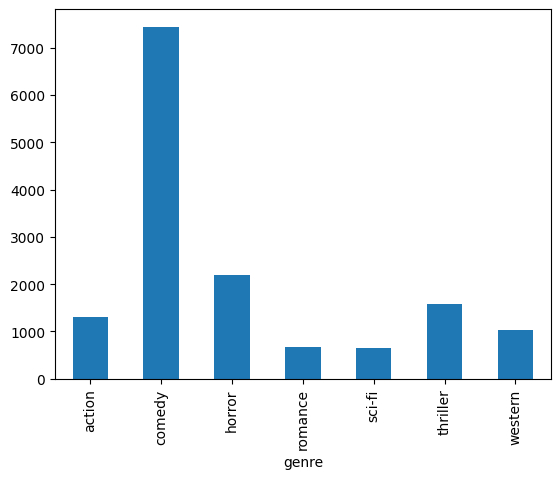

In [27]:
data.groupby("genre").size().plot(kind="bar")
# sdružit podle žánru, počet pro každý řádek, value counts 

In [28]:
vec = CountVectorizer() # budou tam jednotlivé sloupečky, které budou reprezentovat slova, které budou v popiscích
X_train = vec.fit_transform(X_train) # pro trénovací data. Ten mi předpřipraví ty sloupečky
X_test = vec.transform(X_test) # ten už má sloupce předpřipravené a dá je do sloupečků

In [29]:
X_train.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [31]:
X_train.toarray().shape # rozměry tabulky (používáme 70% trénovacích a 30% testovacích )

(11181, 49445)

In [32]:
vec.get_feature_names_out()

array(['00', '000', '003', ..., 'ťthe', 'źs', 'žš'], dtype=object)

In [33]:
#máme odhadnout celkové vyznění zprávy 
clf = KNeighborsClassifier() # hledá slova, která jsou tomu nejblíž
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test) # predikujeme si testovací data - nějaké ty žánry

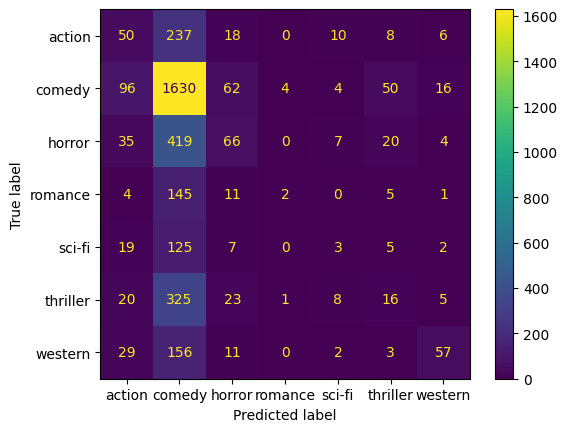

In [34]:
ConfusionMatrixDisplay.from_estimator(
    clf,
    X_test,
    y_test,
)

In [35]:
accuracy_score(y_test, y_pred)

0.48940166353635634

In [ ]:
X = ["Python is great", "I like Python", "Python is the best language", "I hate Python"]
vec = TfidfVectorizer()
X = vec.fit_transform(X)
X = X.toarray()
X

In [ ]:
vec.get_feature_names_out()

In [ ]:
df = pandas.DataFrame(X, columns=vec.get_feature_names_out())
df

In [ ]:
X = ["Python is great", "I like Python", "Python is the best language", "I hate Python"]
vec = TfidfVectorizer(stop_words="english") # stop words, které jsou v angličtině
X = vec.fit_transform(X)
X = X.toarray()
X

In [ ]:
vec.get_feature_names_out()

In [ ]:
df = pandas.DataFrame(X, columns=vec.get_feature_names_out())
df

In [ ]:
# Vlastní seznam stop words


In [ ]:
X = [
    "Python je nejlepší", 
    "Mám rád Python!", 
    "Python je nejlepší jazyk",
    "Nesnáším Python!"
    ]
vec = TfidfVectorizer(stop_words=["je", "mám", "Python"])
X = vec.fit_transform(X)
X = X.toarray()
X

In [ ]:
vec.get_feature_names_out()

In [ ]:
X = data["text"]
y = data["genre"]

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0)

# Uvažujeme stop_words v angličtině
vec = TfidfVectorizer(stop_words="english", ngram_range=(1, 2)) # tuples, uvařuji i dvojici slov - ntice
X_train = vec.fit_transform(X_train)
X_test = vec.transform(X_test)

clf = KNeighborsClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

accuracy_score(y_test, y_pred)

In [ ]:
X = data["text"]
y = data["genre"]

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0)

vec = TfidfVectorizer(stop_words="english", ngram_range=(1, 2))
X_train = vec.fit_transform(X_train)
X_test = vec.transform(X_test)

clf = LinearSVC(class_weight="balanced")
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

accuracy_score(y_test, y_pred) # dostaneme na accuracy 0.77

In [ ]:
# můžeme si vzít slova, a ty žánry 
# a říct si, které slova přiřazují nejvíce k žánrům
clf.classes_

In [ ]:
df_coef = pandas.DataFrame(clf.coef_.T, columns=clf.classes_)
# clf.coef_.T - jaký mají vliv ty features - čím větší hodnota coef., tím víc nám to slovo tlačí do nějakého žánru
df_coef["words"] = vec.get_feature_names_out()
df_coef = df_coef.set_index("words")
df_coef.sort_values("sci-fi", ascending=False).head(20)
df_coef

In [ ]:
df_coef = pandas.DataFrame(clf.coef_.T, columns=clf.classes_)
df_coef["words"] = vec.get_feature_names_out()
df_coef = df_coef.set_index("words")
df_coef = df_coef.sort_values("sci-fi", ascending=False).head(20)
df_coef

In [ ]:
data = pandas.read_csv("reviews.csv")
data.head()

In [ ]:
X = data["review"]
y = data["label"]

In [1]:
#kvíz


In [5]:
data = pandas.read_csv("spam_utf8.csv")
X = data["v2"]
y = data["v1"]

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

vec = TfidfVectorizer()
X_train = vec.fit_transform(X_train)
X_test = vec.transform(X_test)

clf = KNeighborsClassifier(n_neighbors=15)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

accuracy_score(y_test, y_pred)

0.9662598707824839

In [33]:
data = pandas.read_csv("spam_utf8.csv")
X = data["v2"]
y = data["v1"]

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

vec = TfidfVectorizer()
X_train = vec.fit_transform(X_train)
X_test = vec.transform(X_test)

clf = KNeighborsClassifier(n_neighbors=15)# ,class_weight="balanced")
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
balanced_accuracy_score(y_test, y_pred)
#accuracy_score(y_test, y_pred)

0.8788499569886752

In [32]:
data["v1"].value_counts()

ham     4825
spam     747
Name: v1, dtype: int64

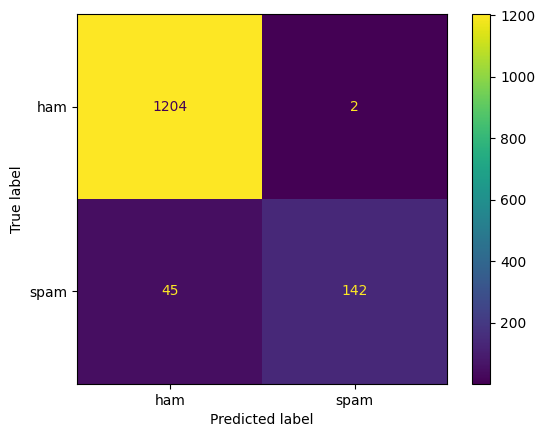

In [12]:
ConfusionMatrixDisplay.from_estimator(
    clf,
    X_test,
    y_test,
)

In [50]:
### Cvičení
data = pandas.read_csv("reviews.csv")
data.head()

,label,product,review
0,neg,music,the cd came as promised and in the condition p...
1,neg,dvd,this was a very annoying and boring flick that...
2,neg,health,the braun ls-5550 silk&soft bodyshave recharge...
3,pos,camera,"when it comes to buying camcorders , i persona..."
4,neg,dvd,i had high hopes for this series when i starte...


In [52]:
X = data["review"]
y = data["label"]

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, random_state=42)
X_train_text = X_train
X_train_text = X_train_text.reset_index(drop = True)

vec = TfidfVectorizer(stop_words="english", ngram_range=(1,2))
X_train = vec.fit_transform(X_train)
X_test_vec = vec.transform(X_test)

# SVM
clf = LinearSVC()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test_vec)

print(accuracy_score(y_test, y_pred))
print(f1_score(y_test, y_pred, pos_label="pos"))

/Users/katerina/pyladies/venv/lib/python3.10/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


0.8206666666666667
0.8181203515889114


In [53]:
#Model má accuracy 82.1% a f1-score 81.8%

In [55]:
report_2 = classification_report(y_test, y_pred)
print(report_2)

              precision    recall  f1-score   support

         neg       0.82      0.83      0.82       758
         pos       0.82      0.82      0.82       742

    accuracy                           0.82      1500
   macro avg       0.82      0.82      0.82      1500
weighted avg       0.82      0.82      0.82      1500



In [58]:
clf_2 = KNeighborsClassifier()
clf_2.fit(X_train,y_train)
y_pred_knn = clf_2.predict(X_test_vec)
print(accuracy_score(y_test, y_pred_knn))
print(f1_score(y_test, y_pred_knn, pos_label="pos"))

0.648
0.65625
